# Part II - (Associations with Loan Amount and Income Range)
## by (Robyn Harrell)

## Investigation Overview

> The main variables of interest were loan amount and income range and their relationship with:
term, borrower APR, loan status, credit rating, loan year, region, debt to income ratio and prosper numeric rating.


## Dataset Overview

> The prosper loans data set contains approximately 110K loan records.  Data such as listing creation date, loan status, borrower APR, estimated return, borrower state, credit score range, total inquiries, debt to income ratio, income range, original loan, original loan date and much more.  The loan data ranges from 2005-2014. No data points were removed for extremeness. 

> It seems like each time the kernel is restarted, we need to reinstall seaborn and plotly_express, so retaining this in the code. These packages are critical for plotting.

In [29]:
!pip install seaborn==0.11.1
!pip install plotly_express

In [30]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

from sklearn import preprocessing
plt.rc("font", size=14)

import plotly.express as px

from collections import Counter

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [31]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
state_mapping_df = pd.read_csv('state_mapping.csv')

#merge data sets on state
df = pd.merge(df, state_mapping_df, how='left',left_on=['BorrowerState'],right_on=['State Code'])
df= df.drop(['State Code'], axis=1)

In [32]:
#clean up the income range values
income_categories = {
    'Not employed': '$0', 
    '$0': '$0', 
    '$1-24,999': '$1-24.9K',
    '$25,000-49,999': '$25k-49.9K',
    '$50,000-74,999': '$50k-74.9K',
    '$75,000-99,999': '$75k-99.9K',
    '$100,000+': '$100k+'}

In [33]:
#consolidating income range values
df['IncomeRange'] = df['IncomeRange'].map(income_categories)

In [34]:
# convert income range into ordered categorical type
ordinal_var_dict = {'IncomeRange': ['$0','$1-24.9K','$25k-49.9K','$50k-74.9K','$75k-99.9K', '$100k+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [35]:
# extract the year of the loan origination
df['loan_year'] = pd.DatetimeIndex(df['LoanOriginationDate']).year

In [36]:
df['credit_bins'] = pd.cut(x=df['CreditScoreRangeUpper'], bins=[300, 579, 669, 739, 799, 850])

In [37]:
median_credit_upper = df.CreditScoreRangeUpper.median()

In [38]:
df['credit_upper_med']=np.where((df['CreditScoreRangeUpper'] >= median_credit_upper),'High', 'Low')

In [39]:
# cleaning up the data set further to the only variables used in analysis
df = df[['IncomeRange', 'LoanOriginalAmount', 'Term', 'BorrowerAPR', 'LoanStatus', 'credit_bins', 'loan_year', 'CreditScoreRangeUpper', 'Region', 'credit_upper_med', 'DebtToIncomeRatio', 'ProsperRating (numeric)', 'State']]

In [40]:
# compare numeric data across income status
income_range_df = df.groupby('IncomeRange').mean().reset_index()

In [41]:
numeric_vars = ['BorrowerAPR', 'ProsperRating (numeric)', 'CreditScoreRangeUpper',  'DebtToIncomeRatio', 'LoanOriginalAmount', 'loan_year']
categoric_vars = ['LoanStatus', 'IncomeRange', 'loan_year', 'Region', 'term']

## (Visualization 1)

Distribution of Income Range

The income range across borrowers has a nice seemingly normal distribution.  Most borrowers have an income between 25k-74.9k. <2% of borrowers in our data set have no income. Approximately 16% of the borrowers have a 6 figure income or higher.

Text(0.5, 1.0, 'Income Range by Frequency')

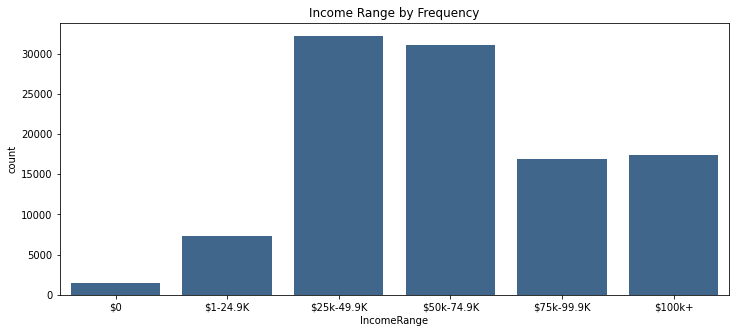

In [42]:
# keep the bar chart clean with one color
base_color = (0.2, 0.4, 0.6, 0.6)
plt.figure(figsize = (12,5))
sb.countplot(data=df, x='IncomeRange', color=base_color)
plt.title('Income Range by Frequency')

## (Visualization 2)

Distribution by Loan Amount

The loan amount distribution appears to be right skewed.  There are few records with loan amounts above 30k.  The median loan amount is 6.5k. 75% of borrowers had a loan amount of 12k or less.

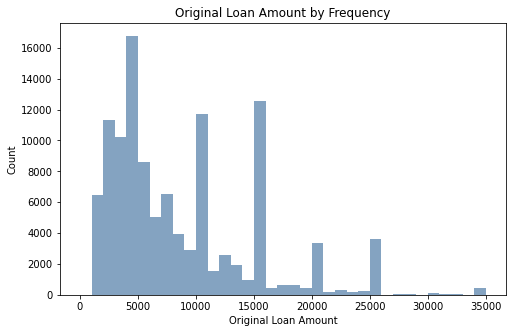

In [43]:
binsize = 1000
bins = np.arange(0, df['LoanOriginalAmount'].max()+binsize, binsize)
base_color = (0.2, 0.4, 0.6, 0.6)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins, color=base_color)
plt.xlabel('Original Loan Amount')
plt.ylabel('Count')
plt.title('Original Loan Amount by Frequency')
plt.show()

## (Visualization 3)

Average Loan Amount by Income Range

The average loan amount was calculated by income range.  We can see that the average loan amount has a steady increase as the income range increases.  Although borrowers with no reported income had a higher average loan amount than the lowest income bracket of those with an income.

Text(0.5, 1.0, 'Average Loan Original Amount by Income Range')

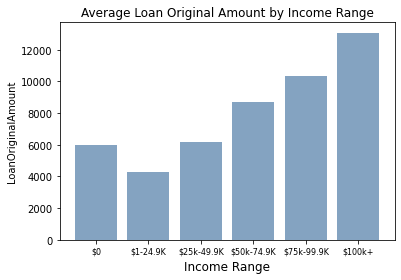

In [44]:
plt.bar(range(len(income_range_df)), income_range_df['LoanOriginalAmount'], color=base_color)
plt.xticks(range(len(income_range_df)), income_range_df['IncomeRange'], fontsize=8)
plt.ylabel('LoanOriginalAmount')
plt.xlabel('Income Range', fontsize=12)
plt.title('Average Loan Original Amount by Income Range')

## (Visualization 4)

Average Debt to Income Ratio

The average debt to income ratio was calculated by income range.  There is a clear decreasing trend of the average debt to income ratio as borrower income increses.

Text(0.5, 1.0, 'Average Debt To Income Ratio by Income Range')

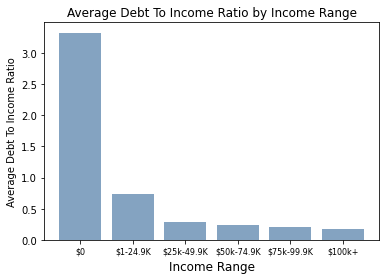

In [45]:
plt.bar(range(len(income_range_df)), income_range_df['DebtToIncomeRatio'], color=base_color)
plt.xticks(range(len(income_range_df)), income_range_df['IncomeRange'], fontsize=8)
plt.ylabel('Average Debt To Income Ratio')
plt.xlabel('Income Range', fontsize=12)
plt.title('Average Debt To Income Ratio by Income Range')

## (Visualization 5)

Average Borrower APR to Income Ratio


The average borrower APR was calculated by income range.  There is a clear decreasing trend of the average borrower APR as income increses.

Text(0.5, 1.0, 'Average Borrower APR by Income Range')

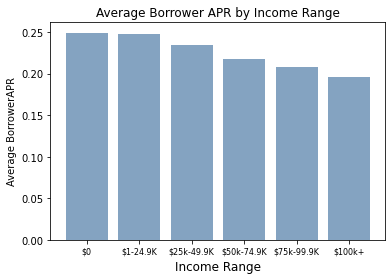

In [46]:
plt.bar(range(len(income_range_df)), income_range_df['BorrowerAPR'], color=base_color)
plt.xticks(range(len(income_range_df)), income_range_df['IncomeRange'], fontsize=8)
plt.ylabel('Average BorrowerAPR', )
plt.xlabel('Income Range', fontsize=12)
plt.title('Average Borrower APR by Income Range')

## (Visualization 6)

Numeric Data Elements Correlation

The plot below shows the relationship between all of the numeric data elements in the data set.  The corresponding heat map legend shows the intensity of the relationship with color.  Noteworthy findings are the strong inverse relationship between the propser numeric rating and borrower APR.  The upper credit score rating and prosper numeric rating have a moderate positive relationship.  Although none of these features are the main end points, these are interesting findings nonehteless.  The remaining relationships not mentioned are either considered weak or neglible and show those features are independent.

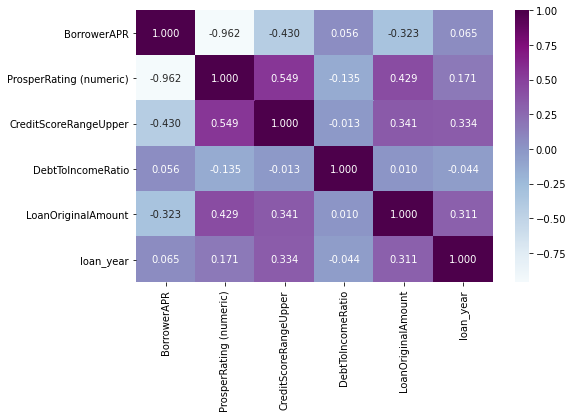

In [47]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'BuPu', center = 0)
plt.show()

## (Visualization 7)

Upper Credit Score Rating by Loan Amount by prosper numeric rating by Term

The 3-D plot can be rotated, magnified and minimized.  By rotating the plot we can see the different angles of the cube and how as the loan amount increases, so does the numeric propser rating and upper credit score.  The color of the dot indicates the term length of the loan and seems independent of these features. Loans of 10k or more are more likely to be 3 year or 5 year terms although loans less than 10k do not seem to follow a particular pattern.

In [48]:
fig = px.scatter_3d(df, x='ProsperRating (numeric)', y='LoanOriginalAmount', z='CreditScoreRangeUpper',
              color='Term')
fig.show()

## (Visualization 8)

Loan Amount by Region by Income Range by Credit Bin

The plot below highlights some of the key insights mentioned in the readme document.  We can see that loan amount appears to be increasing by income range regardless of region.  The distribution of the credit bins looks pretty similar across varying regions and we can see a weak positive trend amongst credit bin and loan amount. 

<Figure size 1440x432 with 0 Axes>

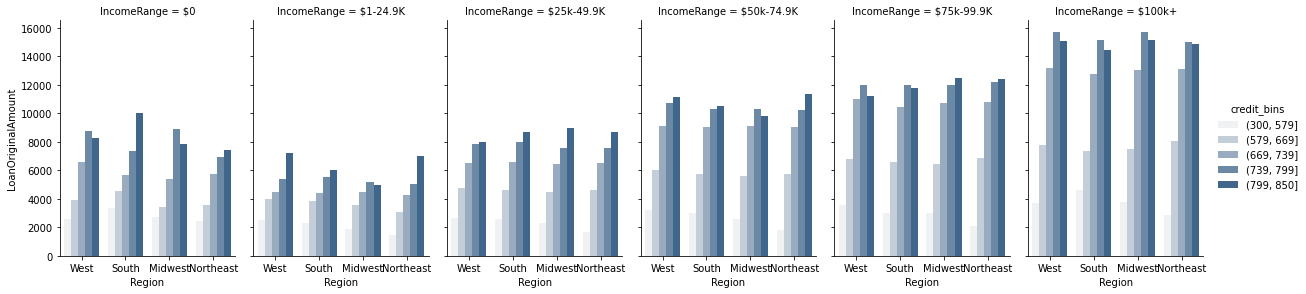

In [49]:
#reference: https://seaborn.pydata.org/generated/seaborn.barplot.html
plt.figure(figsize = (20,6))
g = sb.catplot(x="Region", y="LoanOriginalAmount",
                hue="credit_bins", col="IncomeRange",
                data=df, kind="bar",
                height=4, aspect=.7, ci=None, color=base_color);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  